In [1]:
import os
import cv2

p = os.getcwd()

p

'C:\\Users\\Shanmukha Yenneti\\Desktop'

In [2]:
#me = os.listdir()


def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(im_rgb)
    return images



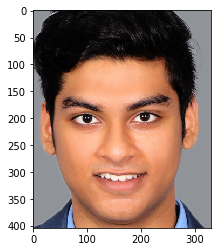

In [58]:
mylist = load_images("C:\\Users\\Shanmukha Yenneti\\Desktop\\me")

from matplotlib import pyplot as plt

plt.imshow(mylist[2])
plt.show()

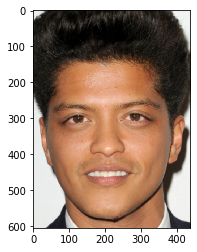

In [4]:
brunolist = load_images("C:\\Users\\Shanmukha Yenneti\\Desktop\\bruno")

from matplotlib import pyplot as plt

plt.imshow(brunolist[0])
plt.show()

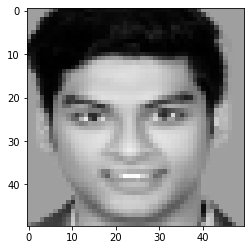

In [57]:
import numpy as np
dim = (50,50)
resized = cv2.resize(mylist[2], dim, interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [40]:
ml=list()
for i in mylist:
    resized = cv2.resize(i, dim, interpolation = cv2.INTER_AREA)
    #gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    a = np.array(resized)
    ml.append(a.flatten())
    
    

In [7]:
ml

[array([255, 255, 255, ..., 211, 254, 255], dtype=uint8),
 array([194, 195, 194, ..., 220, 176, 188], dtype=uint8),
 array([147, 147, 147, ...,  93, 146, 147], dtype=uint8),
 array([ 44,  44,  43, ..., 101, 105, 104], dtype=uint8),
 array([215, 216, 217, ..., 111, 136, 148], dtype=uint8),
 array([235, 251, 251, ..., 254, 254, 255], dtype=uint8),
 array([220, 219, 219, ...,  58,  59,  62], dtype=uint8),
 array([252, 252, 252, ..., 227, 224, 225], dtype=uint8),
 array([204, 205, 205, ...,  64,  82, 142], dtype=uint8),
 array([179, 170, 166, ..., 218, 216, 212], dtype=uint8)]

In [41]:

for i in brunolist:
    resized = cv2.resize(i, dim, interpolation = cv2.INTER_AREA)
    #gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    a = np.array(resized)
    ml.append(a.flatten())
    

In [42]:
numpy_ml = np.asarray(ml)

numpy_ml.shape
#1-shanmukha
#0-bruno
a = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
target = np.asarray(a)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
numpy_ml

array([[255, 255, 255, ..., 255, 255, 255],
       [204, 195, 164, ..., 191, 187, 181],
       [144, 147, 152, ..., 144, 147, 152],
       ...,
       [119, 131, 143, ..., 123, 135, 145],
       [ 78,  65,  57, ...,  49,  45,  46],
       [ 75,  85,  86, ...,  96, 111, 114]], dtype=uint8)

In [44]:
numpy_ml.shape


(20, 7500)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numpy_ml, target, test_size=0.5, random_state=42)



In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [47]:
pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

[Text(167.4, 163.07999999999998, 'X[3629] <= 69.0\nentropy = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

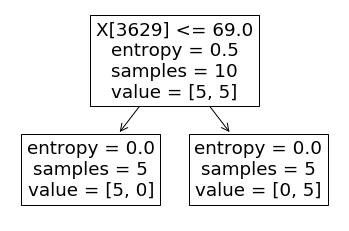

In [48]:
tree.plot_tree(clf.fit(X_train, y_train)) 

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.6

In [79]:
age = [19,19,19,18,17,18,17,18,19,18,31,30,29,31,32,32,33,33,32,33]

tar_age = np.asarray(age)
tar_age.shape

(20,)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(numpy_ml,tar_age, test_size=0.5, random_state=42)


In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
prediction = reg.predict(x_test)
prediction

array([20.22764563, 22.40502495, 28.25529651, 19.07103595, 16.98489927,
       19.68016079, 25.4163519 , 22.51009659, 25.07210792, 21.50820354])

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, prediction))

Mean squared error: 35.61


In [84]:
print('Variance score: %.2f' % r2_score(y_test,prediction))

Variance score: 0.22


In [85]:
y_test

array([19, 33, 32, 19, 19, 18, 30, 18, 32, 33])

In [ ]:
##################################################LETTHEGAMESBEGIN#####################################

In [150]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
his=list()
for i in mylist:
    resized = cv2.resize(i, dim, interpolation = cv2.INTER_AREA)
    #gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("gray", gray)
    hist = cv2.calcHist([resized], [0,1,2], None, [8,8,8], [0, 256,0,256,0,256])
    hist = hist.flatten()
    his.append(hist)

In [151]:
for i in brunolist:
    resized = cv2.resize(i, dim, interpolation = cv2.INTER_AREA)
    #gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("gray", gray)
    hist = cv2.calcHist([resized], [0,1,2], None, [8,8,8], [0, 256,0,256,0,256])
    hist = hist.flatten()
    his.append(hist)

In [152]:
his = np.asarray(his)
his

array([[430.,   6.,   0., ...,   0.,   0., 952.],
       [107.,   0.,   0., ...,   0., 140., 123.],
       [544.,   2.,   0., ...,   0.,   4.,   0.],
       ...,
       [547.,   1.,   0., ...,   0.,   4.,  33.],
       [  0.,   0.,   0., ...,   0.,   0.,  56.],
       [ 41.,   2.,   0., ...,   0., 114.,  70.]], dtype=float32)

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(his,tar_age, test_size=0.5, random_state=42)

In [154]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
prediction = reg.predict(x_test)
prediction

array([28.116468, 36.482838, 24.604954, 29.485157, 28.12817 , 13.408855,
       33.708878, 26.618063, 17.609625, 25.749088], dtype=float32)

In [155]:
y_test

array([19, 33, 32, 19, 19, 18, 30, 18, 32, 33])

In [156]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, prediction))

Mean squared error: 71.20


In [157]:
print('Variance score: %.2f' % r2_score(y_test,prediction))

Variance score: -0.56
